In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

--- Comparative Analysis of Train, Dev, and Test Unigram Runs ---

Processing: Train (unigram_train.csv)
  Total Tokens: 912344
  Unique Words (non-punctuation): 42036
  Unique Real Tags (non-punctuation): 38

Processing: Dev (unigram_dev.csv)
  Total Tokens: 131768
  Unique Words (non-punctuation): 14822
  Unique Real Tags (non-punctuation): 38

Processing: Test (unigram_test.csv)
  Total Tokens: 129654
  Unique Words (non-punctuation): 13710
  Unique Real Tags (non-punctuation): 38


C:\Users\david\AppData\Local\Temp\ipykernel_15096\2706526117.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['top_real_tags'].index, y=summary['top_real_tags'].values, palette="coolwarm")
C:\Users\david\AppData\Local\Temp\ipykernel_15096\2706526117.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['top_real_tags'].index, y=summary['top_real_tags'].values, palette="coolwarm")
C:\Users\david\AppData\Local\Temp\ipykernel_15096\2706526117.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['top_real_tags'].

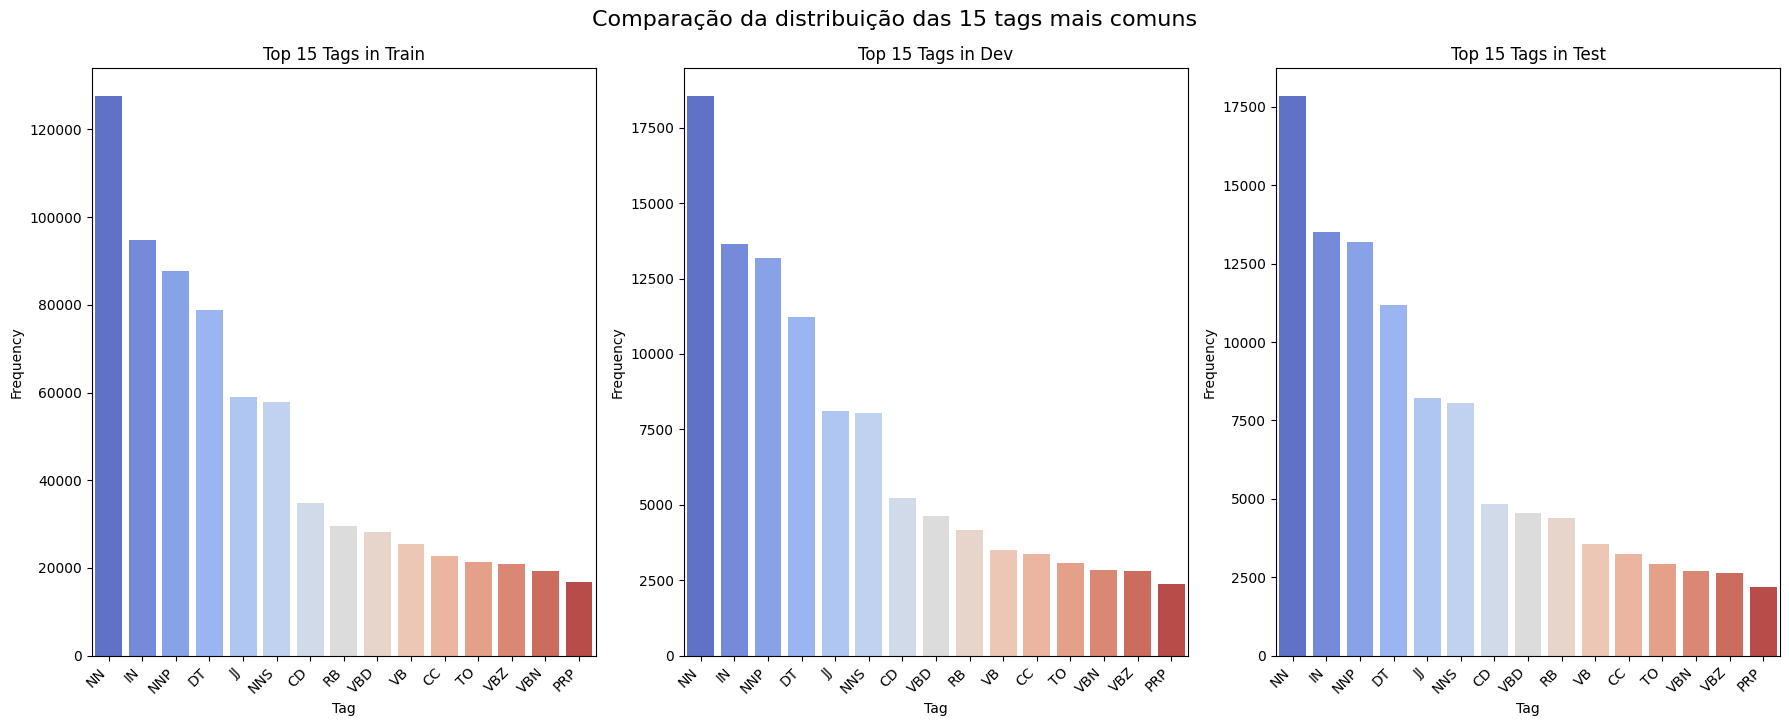

C:\Users\david\AppData\Local\Temp\ipykernel_15096\2706526117.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['top_words'].index, y=summary['top_words'].values, palette="viridis")
C:\Users\david\AppData\Local\Temp\ipykernel_15096\2706526117.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['top_words'].index, y=summary['top_words'].values, palette="viridis")
C:\Users\david\AppData\Local\Temp\ipykernel_15096\2706526117.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['top_words'].index, y=summary['top_

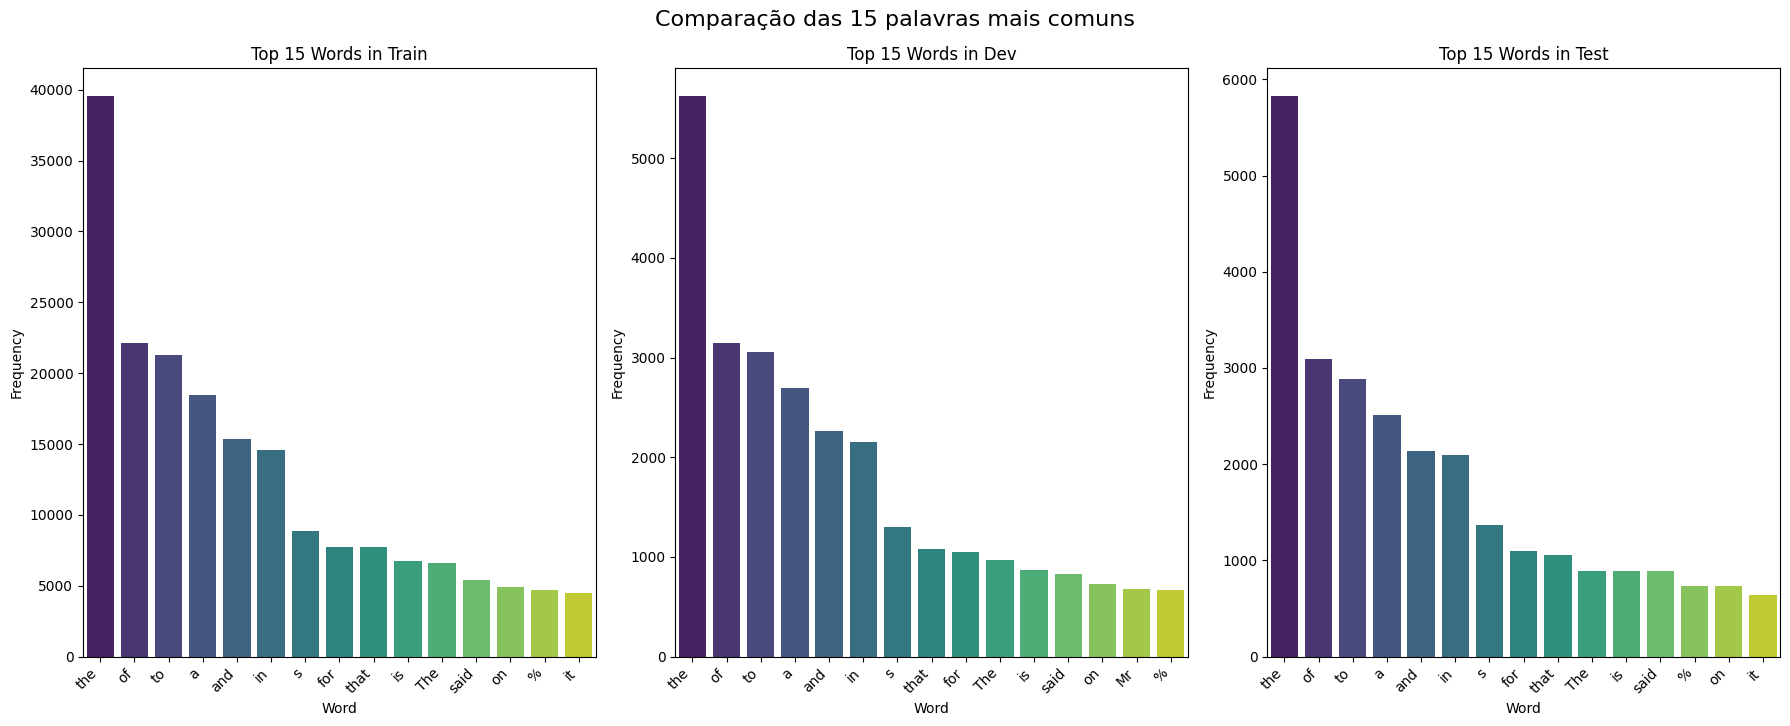



--- Overall Summary ---
Dataset  Total Tokens  Unique Words (non-punc.)  Unique Real Tags (non-punc.)
  Train        912344                     42036                            38
    Dev        131768                     14822                            38
   Test        129654                     13710                            38


In [6]:
# Cell for Comparative Analysis of Train, Dev, Test

dataset_paths = {
    "Train": '../data/runs/unigram_train.csv',
    "Dev": '../data/runs/unigram_dev.csv',
    "Test": '../data/runs/unigram_test.csv'
}

# Re-define chars_to_remove if not defined in the current scope or for clarity
# These are tags that represent punctuation, which we might want to exclude
# from word/tag distribution analysis to focus on lexical items.
punctuation_tags = [',', '``', "''", '.', ';', '#', '%', "'", '"', "$", ":", "(", ")"]
# For filtering words, we might want to remove punctuation characters from the words themselves
punctuation_chars_in_words_regex = r'[#$",.:;`\'()\']|\`\`|\'\'|\-\-' # Added more robust punctuation removal

datasets_summary = {}
top_n = 15

print("--- Comparative Analysis of Train, Dev, and Test Unigram Runs ---")

for name, path in dataset_paths.items():
    print(f"\nProcessing: {name} ({os.path.basename(path)})")
    if not os.path.exists(path):
        print(f"File not found: {path}. Skipping.")
        datasets_summary[name] = None
        continue
    
    try:
        df = pd.read_csv(path)
        
        # --- Basic Stats ---
        num_tokens = len(df)
        
        # --- Word Analysis (excluding punctuation words/tags) ---
        # First, clean the 'word' column by removing punctuation characters from words
        if 'word' in df.columns:
            df['cleaned_word'] = df['word'].astype(str) # Lowercase for consistent counting
            df['cleaned_word'] = df['cleaned_word'].str.replace(punctuation_chars_in_words_regex, '', regex=True)
            # Filter out rows where the 'real' tag is a punctuation mark
            df_words_filtered = df[~df['real'].isin(punctuation_tags) & (df['cleaned_word'] != '')]
            unique_words = df_words_filtered['cleaned_word'].nunique()
            top_words = df_words_filtered['cleaned_word'].value_counts().nlargest(top_n)
        else:
            df['cleaned_word'] = pd.Series(dtype='str') # Empty series
            unique_words = 0
            top_words = pd.Series(dtype='int')

        # --- Real Tag Analysis (excluding punctuation tags) ---
        if 'real' in df.columns:
            df_tags_filtered = df[~df['real'].isin(punctuation_tags)]
            unique_real_tags = df_tags_filtered['real'].nunique()
            top_real_tags = df_tags_filtered['real'].value_counts().nlargest(top_n)
        else:
            unique_real_tags = 0
            top_real_tags = pd.Series(dtype='int')

        datasets_summary[name] = {
            "num_tokens": num_tokens,
            "unique_words": unique_words,
            "unique_real_tags": unique_real_tags,
            "top_words": top_words,
            "top_real_tags": top_real_tags,
            "df_for_plotting_tags": df_tags_filtered, # Store for combined plotting
            "df_for_plotting_words": df_words_filtered # Store for combined plotting
        }
        
        print(f"  Total Tokens: {num_tokens}")
        print(f"  Unique Words (non-punctuation): {unique_words}")
        print(f"  Unique Real Tags (non-punctuation): {unique_real_tags}")

    except Exception as e:
        print(f"Error processing {name} ({path}): {e}")
        datasets_summary[name] = None

# --- Plotting Comparisons ---

# 1. Compare Top N Real Tag Distributions
plt.figure(figsize=(18, 7))
plot_idx = 1
for name, summary in datasets_summary.items():
    if summary and not summary['top_real_tags'].empty:
        plt.subplot(1, len(dataset_paths), plot_idx)
        sns.barplot(x=summary['top_real_tags'].index, y=summary['top_real_tags'].values, palette="coolwarm")
        plt.title(f"Top {top_n} Tags in {name}")
        plt.xlabel("Tag")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plot_idx += 1
plt.suptitle(f"Comparação da distribuição das {top_n} tags mais comuns", fontsize=16, y=1.03)
plt.show()

# 2. Compare Top N Word Appearances
plt.figure(figsize=(18, 7))
plot_idx = 1
for name, summary in datasets_summary.items():
    if summary and not summary['top_words'].empty:
        plt.subplot(1, len(dataset_paths), plot_idx)
        sns.barplot(x=summary['top_words'].index, y=summary['top_words'].values, palette="viridis")
        plt.title(f"Top {top_n} Words in {name}")
        plt.xlabel("Word")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plot_idx += 1
plt.suptitle(f"Comparação das {top_n} palavras mais comuns", fontsize=16, y=1.03)
plt.show()

# --- Print Summary Table ---
summary_df_data = []
for name, summary in datasets_summary.items():
    if summary:
        summary_df_data.append({
            "Dataset": name,
            "Total Tokens": summary["num_tokens"],
            "Unique Words (non-punc.)": summary["unique_words"],
            "Unique Real Tags (non-punc.)": summary["unique_real_tags"]
        })

if summary_df_data:
    summary_table = pd.DataFrame(summary_df_data)
    print("\n\n--- Overall Summary ---")
    print(summary_table.to_string(index=False))
else:
    print("\nNo data to summarize.")


Found 7 CSV files to analyze in d:\Github\part-of-speech-tagging\data\runs:

--- EDA for: unigram_dev.csv ---

1. DataFrame Head:
   id          word real pred
0   0           The   DT   DT
1   0       Arizona  NNP  NNP
2   0  Corporations  NNP  NNS
3   0    Commission  NNP  NNP
4   0    authorized  VBD  VBD

2. DataFrame Shape:
(131768, 4)

3. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131768 entries, 0 to 131767
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      131768 non-null  int64 
 1   word    131767 non-null  object
 2   real    131768 non-null  object
 3   pred    131768 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB

4. Analysis of 'real' (Actual Tags):
  Number of unique 'real' tags: 38
  Top 10 most frequent 'real' tags:
real
NN     18538
IN     13651
NNP    13183
DT     11230
JJ      8094
NNS     8043
CD      5223
VBD     4621
RB      4171
VB      3503
Name: count

C:\Users\david\AppData\Local\Temp\ipykernel_15096\646316563.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_real.index, y=top_n_real.values, palette="viridis")


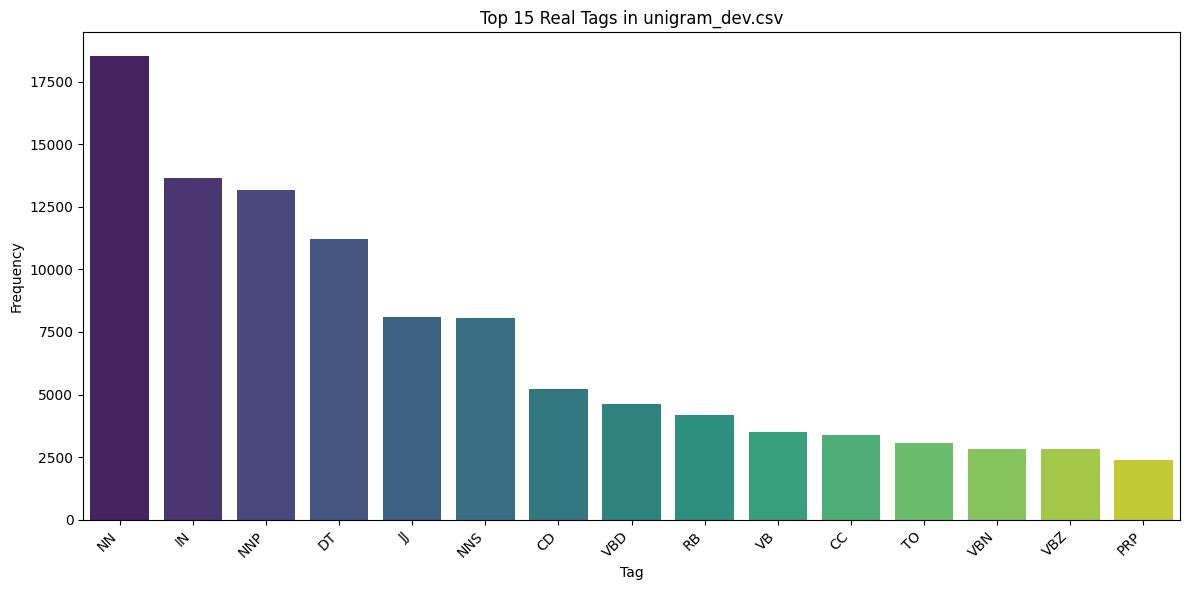

C:\Users\david\AppData\Local\Temp\ipykernel_15096\646316563.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_pred.index, y=top_n_pred.values, palette="magma")


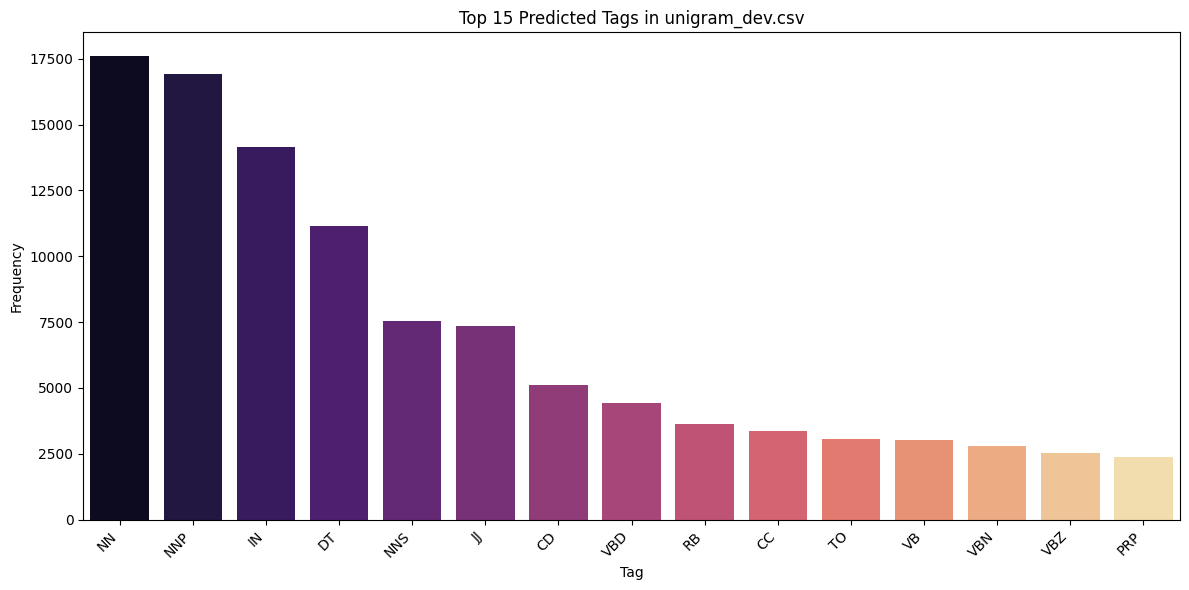



--- EDA for: unigram_test.csv ---

1. DataFrame Head:
   id         word real pred
0   0  Influential   JJ  NNP
1   0      members  NNS  NNS
2   0           of   IN   IN
3   0          the   DT   DT
4   0        House  NNP  NNP

2. DataFrame Shape:
(129654, 4)

3. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129654 entries, 0 to 129653
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      129654 non-null  int64 
 1   word    129654 non-null  object
 2   real    129654 non-null  object
 3   pred    129654 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB

4. Analysis of 'real' (Actual Tags):
  Number of unique 'real' tags: 38
  Top 10 most frequent 'real' tags:
real
NN     17834
IN     13492
NNP    13177
DT     11183
JJ      8215
NNS     8061
CD      4823
VBD     4561
RB      4405
VB      3573
Name: count, dtype: int64
  Missing 'real' tags: 0

5. Analysis of 'pred' (Predicted Tags):

C:\Users\david\AppData\Local\Temp\ipykernel_15096\646316563.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_real.index, y=top_n_real.values, palette="viridis")


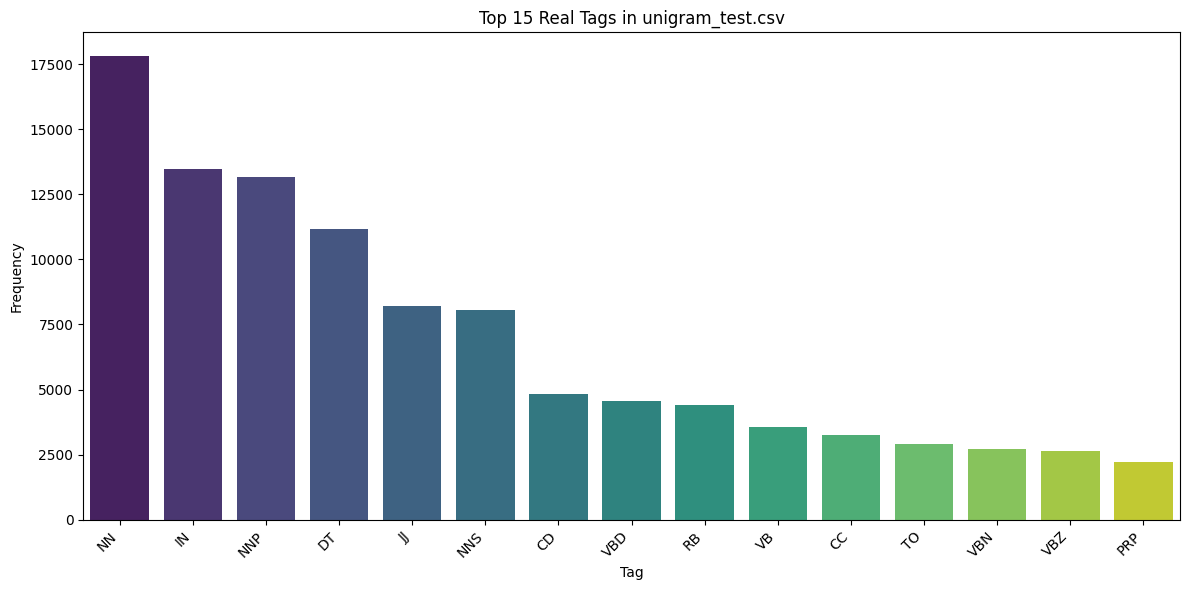

C:\Users\david\AppData\Local\Temp\ipykernel_15096\646316563.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_pred.index, y=top_n_pred.values, palette="magma")


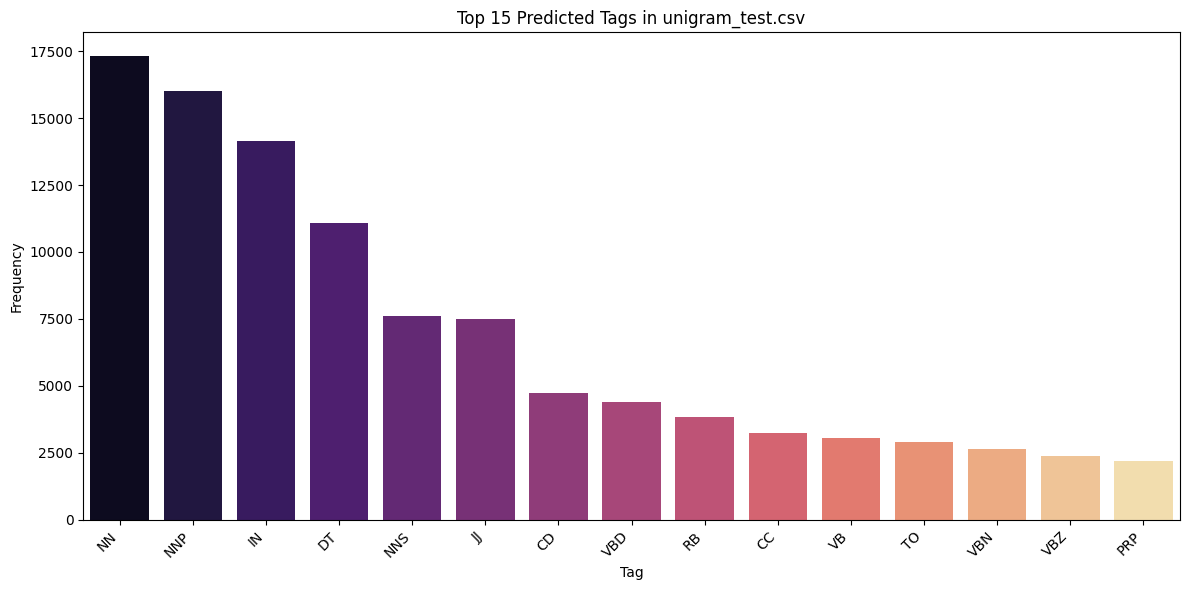



--- EDA for: unigram_train.csv ---

1. DataFrame Head:
   id    word real pred
0   0  Pierre  NNP  NNP
1   0  Vinken  NNP  NNP
2   0       ,    ,    ,
3   0      61   CD   CD
4   0   years  NNS  NNS

2. DataFrame Shape:
(912344, 4)

3. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912344 entries, 0 to 912343
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      912344 non-null  int64 
 1   word    912329 non-null  object
 2   real    912344 non-null  object
 3   pred    912344 non-null  object
dtypes: int64(1), object(3)
memory usage: 27.8+ MB

4. Analysis of 'real' (Actual Tags):
  Number of unique 'real' tags: 38
  Top 10 most frequent 'real' tags:
real
NN     127563
IN      94760
NNP     87693
DT      78777
JJ      58957
NNS     57860
CD      34891
RB      29621
VBD     28311
VB      25489
Name: count, dtype: int64
  Missing 'real' tags: 0

5. Analysis of 'pred' (Predicted Tags):
  Number of uniqu

C:\Users\david\AppData\Local\Temp\ipykernel_15096\646316563.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_real.index, y=top_n_real.values, palette="viridis")


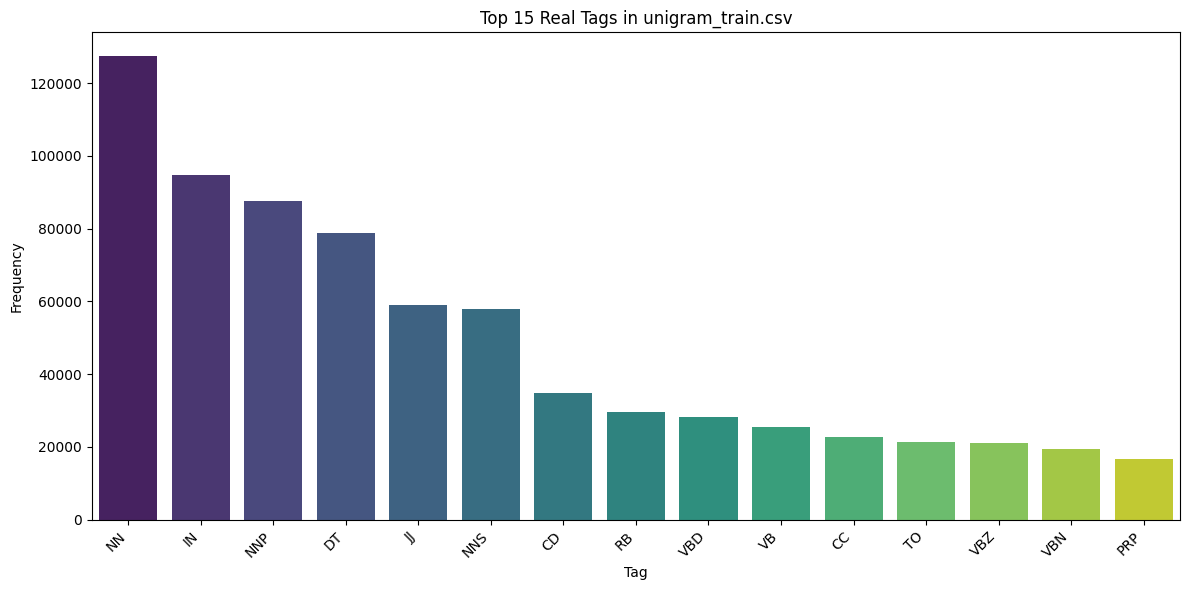

C:\Users\david\AppData\Local\Temp\ipykernel_15096\646316563.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_pred.index, y=top_n_pred.values, palette="magma")


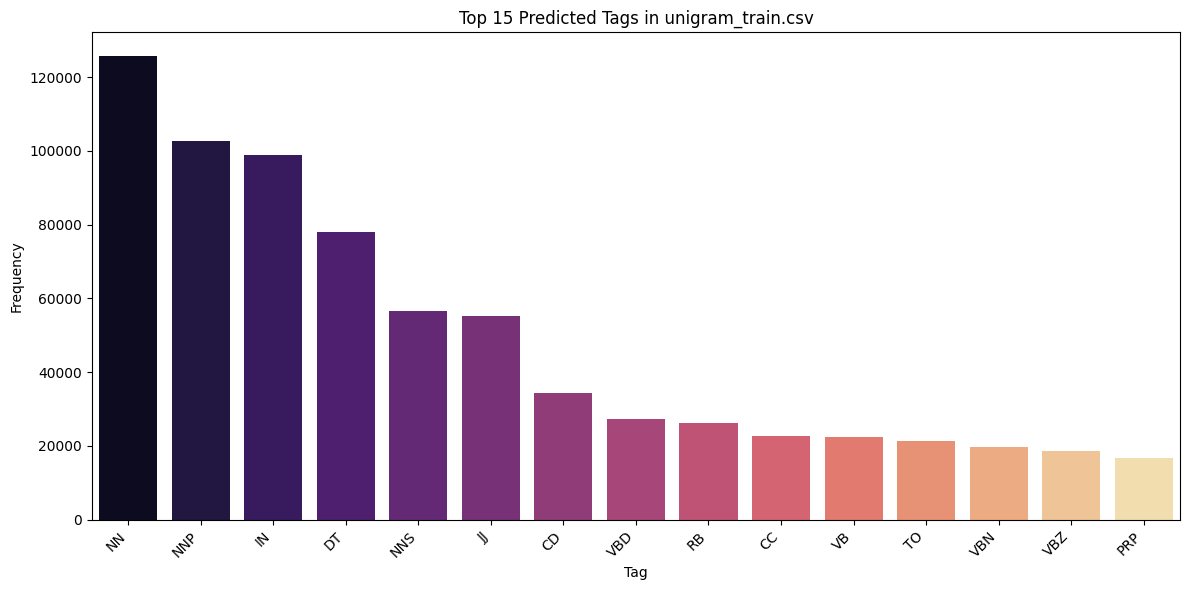

In [ ]:
# Assuming this notebook is in the 'analysis' directory
train = '../data/runs/unigram_train.csv'
dev = '../data/runs/unigram_dev.csv'
test = '../data/runs/unigram_test.csv'



# Characters/tags to potentially exclude from analysis if they are punctuation
# This list is based on your analysis/final.ipynb
chars_to_remove = [',', '``', "''", '.', ';', '#', '%', "'", '"', "$", ":", "(", ")"]


if not csv_files:
    print(f"No CSV files found in {os.path.abspath(runs_directory)}")
else:
    print(f"Found {len(csv_files)} CSV files to analyze in {os.path.abspath(runs_directory)}:\n")
    for file_path in csv_files:
        if "unigram" not in file_path:
            continue
        print(f"--- EDA for: {os.path.basename(file_path)} ---")
        try:
            df = pd.read_csv(file_path)

            print("\n1. DataFrame Head:")
            print(df.head())

            print("\n2. DataFrame Shape:")
            print(df.shape)

            print("\n3. DataFrame Info:")
            df.info()

            if 'real' not in df.columns or 'pred' not in df.columns:
                print(f"\nSkipping detailed analysis for {os.path.basename(file_path)}: Missing 'real' or 'pred' columns.")
                print("\n" + "="*70 + "\n")
                continue

            # Optional: Filter out rows where 'real' tag is a punctuation mark for cleaner tag analysis
            df = df[~df['real'].isin(chars_to_remove)].copy()
            # If you use df_filtered, replace df with df_filtered in subsequent steps for 'real' and 'pred' analysis
            # For this simple EDA, we'll use the original df and be aware punctuation might be in tag counts.

            print("\n4. Analysis of 'real' (Actual Tags):")
            df['real'] = df['real'].astype(str) # Ensure string type
            print(f"  Number of unique 'real' tags: {df['real'].nunique()}")
            print("  Top 10 most frequent 'real' tags:")
            print(df['real'].value_counts().nlargest(10))
            print(f"  Missing 'real' tags: {df['real'].isnull().sum()}")

            print("\n5. Analysis of 'pred' (Predicted Tags):")
            df['pred'] = df['pred'].astype(str) # Ensure string type
            print(f"  Number of unique 'pred' tags: {df['pred'].nunique()}")
            print("  Top 10 most frequent 'pred' tags:")
            print(df['pred'].value_counts().nlargest(10))
            print(f"  Missing 'pred' tags: {df['pred'].isnull().sum()}")

            print(df['word'].value_counts().nlargest(20))
            
            # Consider rows where 'real' is not a punctuation mark for accuracy
            df_for_accuracy = df[~df['real'].isin(chars_to_remove)].copy()
            if not df_for_accuracy.empty:
                accuracy = accuracy_score(df_for_accuracy['real'], df_for_accuracy['pred'])
                print(f"\n6. Overall Accuracy (excluding punctuation in 'real'): {accuracy:.4f}")
            else:
                print("\n6. Overall Accuracy: Not enough data after filtering punctuation to calculate.")

            print(df.pred.value_counts())
            # Plotting top N real tags
            plt.figure(figsize=(12, 6))
            top_n_real = df['real'].value_counts().nlargest(15)
            sns.barplot(x=top_n_real.index, y=top_n_real.values, palette="viridis")
            plt.title(f'Top 15 Real Tags in {os.path.basename(file_path)}')
            plt.xlabel('Tag')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

            # Plotting top N predicted tags
            plt.figure(figsize=(12, 6))
            top_n_pred = df['pred'].value_counts().nlargest(15)
            sns.barplot(x=top_n_pred.index, y=top_n_pred.values, palette="magma")
            plt.title(f'Top 15 Predicted Tags in {os.path.basename(file_path)}')
            plt.xlabel('Tag')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

            print("\n" + "="*70 + "\n")

        except Exception as e:
            print(f"Error processing {os.path.basename(file_path)}: {e}")
            print("\n" + "="*70 + "\n")